In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

### Draw image

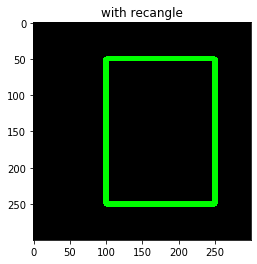

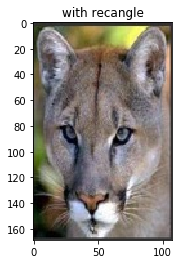

In [5]:
surface = np.zeros((300,300,3), dtype="uint8")
green = (0, 255, 0)
cv2.rectangle(surface, (250,250), (100,50), green, 5)
displayColorImage(surface, "with recangle")

surface = cv2.imread("data/cougarface.jpg")
displayColorImage(surface, "with recangle")


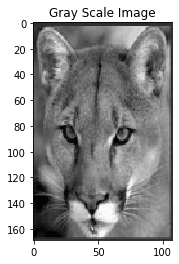

In [6]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(surface, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

### Sobel Kernels

In [7]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(surface, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

[[  0.          10.          10.         ...   4.          16.
    0.        ]
 [  4.          12.08304597  11.66190379 ...   7.61577311   7.61577311
   12.        ]
 [  2.          12.16552506  29.15475947 ... 229.05894438 147.1393897
   66.        ]
 ...
 [ 70.         118.79393924  99.47864092 ... 168.43396332 253.62176563
   44.        ]
 [130.         159.39887076 165.22106403 ... 273.0018315  209.44211611
   92.        ]
 [  0.          26.          16.         ...   0.          56.
    0.        ]]
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [ 90.          24.44395478  30.96375653 ...  23.19859051 156.80140949
   90.        ]
 [ 90.          99.46232221  95.90614111 ...  95.51147742 117.08749061
   90.        ]
 ...
 [ 90.         135.          59.82647997 ...  58.10278994  18.86358756
   90.        ]
 [ 90.         107.52556837  80.5946885  ...  83.05720496  51.98105741
   90.        ]
 [  0.           0.           0.         ...   0.        

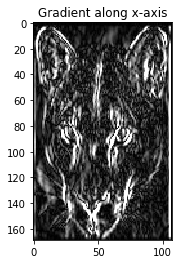

In [8]:
displayGrayScaleImage(gX, "Gradient along x-axis")

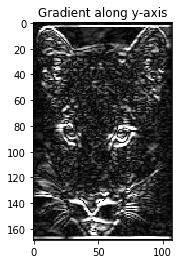

In [9]:
displayGrayScaleImage(gY, "Gradient along y-axis")

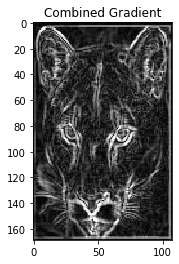

In [10]:
displayGrayScaleImage(sobelCombined, "Combined Gradient")

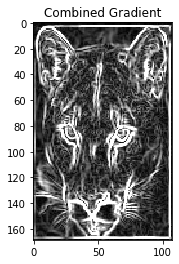

In [11]:
displayGrayScaleImage(mag, "Combined Gradient")

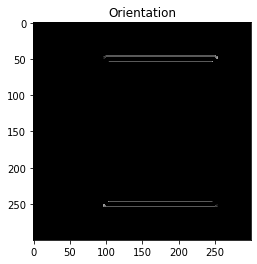

In [11]:
displayGrayScaleImage(orientation, "Orientation")

In [12]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


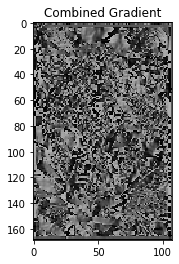

In [12]:
displayGrayScaleImage(orientation, "Combined Gradient")

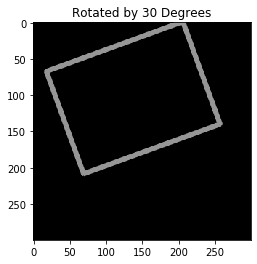

In [14]:
#get center of image
(height, width) = gray.shape[:2]
(centerX, centerY) = (width / 2, height / 2)
 
# rotate our image by 30 degrees in counterclockwise direction, scale by 1.0 
Modified = cv2.getRotationMatrix2D((centerX-10, centerY-10), 110, 1.0)
postRotation = cv2.warpAffine(gray, Modified, (width, height))
displayGrayScaleImage(postRotation, "Rotated by 30 Degrees")
 

In [15]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(postRotation, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(postRotation, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


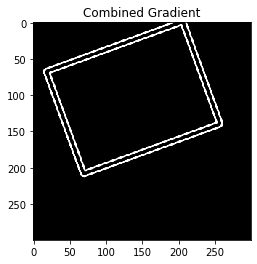

In [16]:
displayGrayScaleImage(mag, "Combined Gradient")

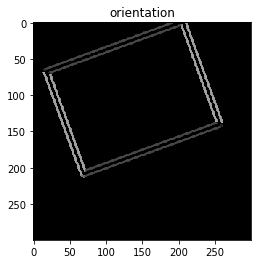

In [17]:
displayGrayScaleImage(orientation, "orientation")

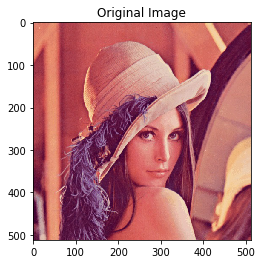

In [43]:
# Read Image 
image = cv2.imread("./data/lena.jpg")
displayColorImage(image, "Original Image")

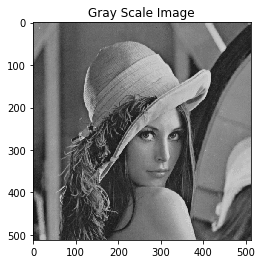

In [44]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

In [45]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [ 90.           8.97262661  30.96375653 ...   0.7848246    0.
    0.        ]
 [ 90.         171.02737339 108.43494882 ...   8.80679269   1.21887524
   90.        ]
 ...
 [ 90.         161.56505118 169.9920202  ...  78.69006753 129.28940686
   90.        ]
 [ 90.          38.65980825  47.14758543 ...  59.03624347 119.0546041
   90.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [46]:
#normalize gx and gy
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

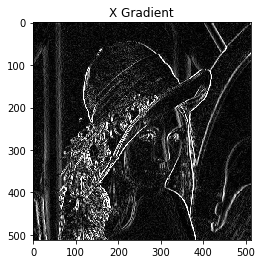

In [47]:
displayGrayScaleImage(gX, "X Gradient")

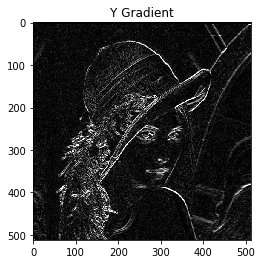

In [48]:
displayGrayScaleImage(gY, "Y Gradient")

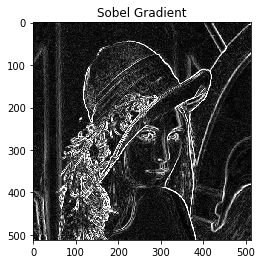

In [49]:
displayGrayScaleImage(mag, "Sobel Gradient")

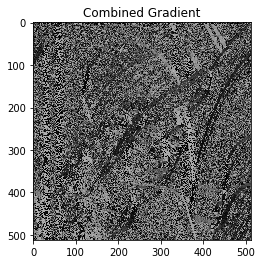

In [50]:
displayGrayScaleImage(orientation, "Combined Gradient")

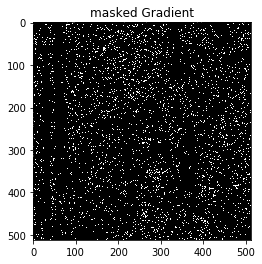

In [51]:
# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= 85, orientation, -1)
idxs = np.where(orientation <= 100 , idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255
displayGrayScaleImage(mask, "masked Gradient")

### Scharr Kernels

In [52]:
# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
gX = cv2.Scharr(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Scharr(gray, ddepth=cv2.CV_64F, dx=0, dy=1)
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

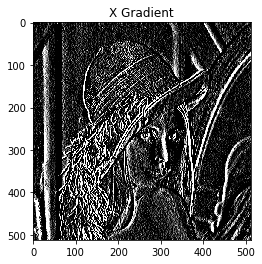

In [53]:
displayGrayScaleImage(gX, "X Gradient")

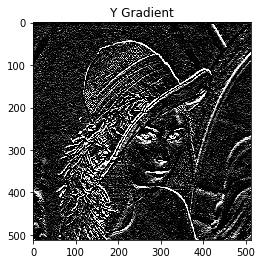

In [54]:
displayGrayScaleImage(gY, "Y Gradient")

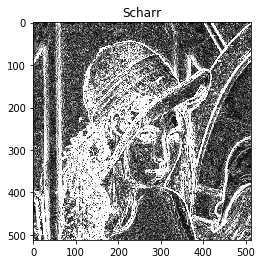

In [55]:
displayGrayScaleImage(mag, "Scharr")

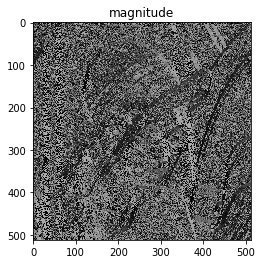

In [30]:
displayGrayScaleImage(orientation, "magnitude")

### Canny Kernels

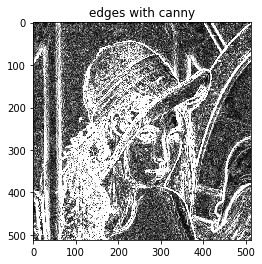

In [33]:
edges = cv2.Canny(gray, 100, 200, 3, L2gradient=True)
displayGrayScaleImage(mag, "edges with canny")

### Lapacian Filters

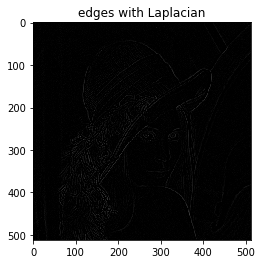

In [41]:

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
displayGrayScaleImage(laplacian, "edges with Laplacian")